In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import time

#parameters for simulation
duration = 30
#set quality from 2 to 100 (1 for low quali and short):
quality=10

if quality<2:
    fps = 5
    duration = 5
    sphere_verts = 3
else:
    fps = int(np.ceil(((quality+20)/110)*40))
    sphere_verts = int(np.ceil(((quality+4)/104)*50))

print(fps)
print(sphere_verts)


# Simulate gravity #
# assign constants
G = 6.6743 * 10**-11
m_1 = 9**11
m_2 = 10**11
m_3 = 6**11
# initial conditions
x_1_0=0
x_1_dot_0=0.5
y_1_0=-1
y_1_dot_0=1.4
z_1_0=0
z_1_dot_0=0.8

x_2_0=4
x_2_dot_0=0.3
y_2_0=0
y_2_dot_0=0.2
z_2_0=1
z_2_dot_0=0.3

x_3_0=2
x_3_dot_0=0
y_3_0=1
y_3_dot_0=0
z_3_0=3
z_3_dot_0=0


x0 = np.array([x_1_0, x_1_dot_0, x_2_0,x_2_dot_0, x_3_0, x_3_dot_0, y_1_0, y_1_dot_0, y_2_0, y_2_dot_0, y_3_0, y_3_dot_0, z_1_0, z_1_dot_0, z_2_0, z_2_dot_0, z_3_0, z_3_dot_0])


# System of ODE:
def Gravity_Sim_ODE(t, y):
    x_1 = y[0]
    x_1_dot = y[1]
    x_2 = y[2]
    x_2_dot = y[3]
    x_3 = y[4]
    x_3_dot = y[5]
    y_1 = y[6]
    y_1_dot = y[7]
    y_2 = y[8]
    y_2_dot = y[9]
    y_3 = y[10]
    y_3_dot = y[11]
    z_1 = y[12]
    z_1_dot = y[13]
    z_2 = y[14]
    z_2_dot = y[15]
    z_3 = y[16]
    z_3_dot = y[17]
    
    return (x_1_dot,
            G*(-m_2*x_1**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*x_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1**2*x_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_2*x_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*x_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*y_1*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_2*x_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_2*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_2*y_1*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_2*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_2*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_3*x_1**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1**2*x_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_1*x_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_1*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*y_1*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_1*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_1*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_1*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_3*y_1*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_3*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*(x_1**4 - 2*x_1**3*x_2 - 2*x_1**3*x_3 + x_1**2*x_2**2 + 4*x_1**2*x_2*x_3 + x_1**2*x_3**2 + 2*x_1**2*y_1**2 - 2*x_1**2*y_1*y_2 - 2*x_1**2*y_1*y_3 + x_1**2*y_2**2 + x_1**2*y_3**2 + 2*x_1**2*z_1**2 - 2*x_1**2*z_1*z_2 - 2*x_1**2*z_1*z_3 + x_1**2*z_2**2 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_1**2 + 4*x_1*x_2*y_1*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_1**2 + 4*x_1*x_2*z_1*z_3 - 2*x_1*x_2*z_3**2 - 2*x_1*x_3*y_1**2 + 4*x_1*x_3*y_1*y_2 - 2*x_1*x_3*y_2**2 - 2*x_1*x_3*z_1**2 + 4*x_1*x_3*z_1*z_2 - 2*x_1*x_3*z_2**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**4 - 2*y_1**3*y_2 - 2*y_1**3*y_3 + y_1**2*y_2**2 + 4*y_1**2*y_2*y_3 + y_1**2*y_3**2 + 2*y_1**2*z_1**2 - 2*y_1**2*z_1*z_2 - 2*y_1**2*z_1*z_3 + y_1**2*z_2**2 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_1**2 + 4*y_1*y_2*z_1*z_3 - 2*y_1*y_2*z_3**2 - 2*y_1*y_3*z_1**2 + 4*y_1*y_3*z_1*z_2 - 2*y_1*y_3*z_2**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**4 - 2*z_1**3*z_2 - 2*z_1**3*z_3 + z_1**2*z_2**2 + 4*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**2*z_3**2)),
            x_2_dot,
            G*(m_1*x_1*x_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_1*x_2*x_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_1*x_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_1*y_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_1*y_2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_1*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2**2*x_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2*x_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2*y_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*y_2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_3*x_1**2*x_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*x_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*x_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_2*y_1*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_2*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*y_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_3*y_1*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_3*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_3*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**3 + 4*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_2**2 + 4*x_1*x_2*y_2*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_2**2 + 4*x_1*x_2*z_2*z_3 - 2*x_1*x_2*z_3**2 + x_2**4 - 2*x_2**3*x_3 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_2 + 2*x_2**2*y_2**2 - 2*x_2**2*y_2*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_2 + 2*x_2**2*z_2**2 - 2*x_2**2*z_2*z_3 + x_2**2*z_3**2 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_2 - 2*x_2*x_3*y_2**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_2 - 2*x_2*x_3*z_2**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**3 + 4*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_2**2 + 4*y_1*y_2*z_2*z_3 - 2*y_1*y_2*z_3**2 + y_2**4 - 2*y_2**3*y_3 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_2 + 2*y_2**2*z_2**2 - 2*y_2**2*z_2*z_3 + y_2**2*z_3**2 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_2 - 2*y_2*y_3*z_2**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**3 + 4*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**4 - 2*z_2**3*z_3 + z_2**2*z_3**2)),
            x_3_dot,
            G*(-m_1*x_2**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_2**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*x_3*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_2*x_3*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_3**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_3**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*y_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_1*y_2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_2**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_2*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_3*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_2*x_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*x_3*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_3*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_3**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_3**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1*y_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_1*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_2*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_3*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2))/(np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 + 4*x_1*x_2*x_3**2 - 2*x_1*x_3**3 - 2*x_1*x_3*y_2**2 + 4*x_1*x_3*y_2*y_3 - 2*x_1*x_3*y_3**2 - 2*x_1*x_3*z_2**2 + 4*x_1*x_3*z_2*z_3 - 2*x_1*x_3*z_3**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 - 2*x_2*x_3**3 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_3 - 2*x_2*x_3*y_3**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_3 - 2*x_2*x_3*z_3**2 + x_3**4 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_3 + x_3**2*y_2**2 - 2*x_3**2*y_2*y_3 + 2*x_3**2*y_3**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_3 + x_3**2*z_2**2 - 2*x_3**2*z_2*z_3 + 2*x_3**2*z_3**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 + 4*y_1*y_2*y_3**2 - 2*y_1*y_3**3 - 2*y_1*y_3*z_2**2 + 4*y_1*y_3*z_2*z_3 - 2*y_1*y_3*z_3**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 - 2*y_2*y_3**3 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_3 - 2*y_2*y_3*z_3**2 + y_3**4 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_3 + y_3**2*z_2**2 - 2*y_3**2*z_2*z_3 + 2*y_3**2*z_3**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 + 4*z_1*z_2*z_3**2 - 2*z_1*z_3**3 + z_2**2*z_3**2 - 2*z_2*z_3**3 + z_3**4)),
            y_1_dot,
            G*(-m_2*x_1**2*y_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*x_3*y_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_3*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_3**2*y_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_3**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_1*y_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_2*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_2*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_3*x_1**2*y_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*x_2*y_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2**2*y_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_1*y_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_1*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_2**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_3*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_3*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*(x_1**4 - 2*x_1**3*x_2 - 2*x_1**3*x_3 + x_1**2*x_2**2 + 4*x_1**2*x_2*x_3 + x_1**2*x_3**2 + 2*x_1**2*y_1**2 - 2*x_1**2*y_1*y_2 - 2*x_1**2*y_1*y_3 + x_1**2*y_2**2 + x_1**2*y_3**2 + 2*x_1**2*z_1**2 - 2*x_1**2*z_1*z_2 - 2*x_1**2*z_1*z_3 + x_1**2*z_2**2 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_1**2 + 4*x_1*x_2*y_1*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_1**2 + 4*x_1*x_2*z_1*z_3 - 2*x_1*x_2*z_3**2 - 2*x_1*x_3*y_1**2 + 4*x_1*x_3*y_1*y_2 - 2*x_1*x_3*y_2**2 - 2*x_1*x_3*z_1**2 + 4*x_1*x_3*z_1*z_2 - 2*x_1*x_3*z_2**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**4 - 2*y_1**3*y_2 - 2*y_1**3*y_3 + y_1**2*y_2**2 + 4*y_1**2*y_2*y_3 + y_1**2*y_3**2 + 2*y_1**2*z_1**2 - 2*y_1**2*z_1*z_2 - 2*y_1**2*z_1*z_3 + y_1**2*z_2**2 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_1**2 + 4*y_1*y_2*z_1*z_3 - 2*y_1*y_2*z_3**2 - 2*y_1*y_3*z_1**2 + 4*y_1*y_3*z_1*z_2 - 2*y_1*y_3*z_2**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**4 - 2*z_1**3*z_2 - 2*z_1**3*z_3 + z_1**2*z_2**2 + 4*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**2*z_3**2)),
            y_2_dot,
            G*(m_1*x_2**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2**2*y_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_2*x_3*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*x_3*y_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_3**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_3**2*y_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_1*y_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_1*y_2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_1*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_2**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_2*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_3*x_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*x_2*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_1*y_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_1*y_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_2**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_2**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_2*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_2*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_3*z_1*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_3*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**3 + 4*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_2**2 + 4*x_1*x_2*y_2*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_2**2 + 4*x_1*x_2*z_2*z_3 - 2*x_1*x_2*z_3**2 + x_2**4 - 2*x_2**3*x_3 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_2 + 2*x_2**2*y_2**2 - 2*x_2**2*y_2*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_2 + 2*x_2**2*z_2**2 - 2*x_2**2*z_2*z_3 + x_2**2*z_3**2 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_2 - 2*x_2*x_3*y_2**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_2 - 2*x_2*x_3*z_2**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**3 + 4*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_2**2 + 4*y_1*y_2*z_2*z_3 - 2*y_1*y_2*z_3**2 + y_2**4 - 2*y_2**3*y_3 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_2 + 2*y_2**2*z_2**2 - 2*y_2**2*z_2*z_3 + y_2**2*z_3**2 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_2 - 2*y_2*y_3*z_2**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**3 + 4*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**4 - 2*z_2**3*z_3 + z_2**2*z_3**2)),
            y_3_dot,
            G*(-m_1*x_2**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_2**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*x_3*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_2*x_3*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_3**2*y_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_3**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*y_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_1*y_2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_2**2*y_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_2*y_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_3*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_2*x_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*x_3*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_3*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_3**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_3**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1**2*y_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_1**2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1*y_2*y_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_1*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*y_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_2*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3*z_1**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_3*z_1*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2))/(np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 + 4*x_1*x_2*x_3**2 - 2*x_1*x_3**3 - 2*x_1*x_3*y_2**2 + 4*x_1*x_3*y_2*y_3 - 2*x_1*x_3*y_3**2 - 2*x_1*x_3*z_2**2 + 4*x_1*x_3*z_2*z_3 - 2*x_1*x_3*z_3**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 - 2*x_2*x_3**3 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_3 - 2*x_2*x_3*y_3**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_3 - 2*x_2*x_3*z_3**2 + x_3**4 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_3 + x_3**2*y_2**2 - 2*x_3**2*y_2*y_3 + 2*x_3**2*y_3**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_3 + x_3**2*z_2**2 - 2*x_3**2*z_2*z_3 + 2*x_3**2*z_3**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 + 4*y_1*y_2*y_3**2 - 2*y_1*y_3**3 - 2*y_1*y_3*z_2**2 + 4*y_1*y_3*z_2*z_3 - 2*y_1*y_3*z_3**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 - 2*y_2*y_3**3 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_3 - 2*y_2*y_3*z_3**2 + y_3**4 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_3 + y_3**2*z_2**2 - 2*y_3**2*z_2*z_3 + 2*y_3**2*z_3**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 + 4*z_1*z_2*z_3**2 - 2*z_1*z_3**3 + z_2**2*z_3**2 - 2*z_2*z_3**3 + z_3**4)),
            z_1_dot,
            G*(-m_2*x_1**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*x_3*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_3*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_3**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_3**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1*y_3*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_1*y_3*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_3**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*z_1**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*z_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*z_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*z_1*z_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*z_1*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*z_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_3*x_1**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*x_2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_1*y_2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_1*y_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_2**2*z_1*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*z_1**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*z_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*z_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*z_1*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*z_1*z_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*z_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*(x_1**4 - 2*x_1**3*x_2 - 2*x_1**3*x_3 + x_1**2*x_2**2 + 4*x_1**2*x_2*x_3 + x_1**2*x_3**2 + 2*x_1**2*y_1**2 - 2*x_1**2*y_1*y_2 - 2*x_1**2*y_1*y_3 + x_1**2*y_2**2 + x_1**2*y_3**2 + 2*x_1**2*z_1**2 - 2*x_1**2*z_1*z_2 - 2*x_1**2*z_1*z_3 + x_1**2*z_2**2 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_1**2 + 4*x_1*x_2*y_1*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_1**2 + 4*x_1*x_2*z_1*z_3 - 2*x_1*x_2*z_3**2 - 2*x_1*x_3*y_1**2 + 4*x_1*x_3*y_1*y_2 - 2*x_1*x_3*y_2**2 - 2*x_1*x_3*z_1**2 + 4*x_1*x_3*z_1*z_2 - 2*x_1*x_3*z_2**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**4 - 2*y_1**3*y_2 - 2*y_1**3*y_3 + y_1**2*y_2**2 + 4*y_1**2*y_2*y_3 + y_1**2*y_3**2 + 2*y_1**2*z_1**2 - 2*y_1**2*z_1*z_2 - 2*y_1**2*z_1*z_3 + y_1**2*z_2**2 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_1**2 + 4*y_1*y_2*z_1*z_3 - 2*y_1*y_2*z_3**2 - 2*y_1*y_3*z_1**2 + 4*y_1*y_3*z_1*z_2 - 2*y_1*y_3*z_2**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**4 - 2*z_1**3*z_2 - 2*z_1**3*z_3 + z_1**2*z_2**2 + 4*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**2*z_3**2)),
            z_2_dot,
            G*(m_1*x_2**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_2**2*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_2*x_3*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*x_3*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_3**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_3**2*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_2**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2**2*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_2*y_3*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_2*y_3*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_3**2*z_2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*z_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*z_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*z_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*z_2**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*z_2**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*z_2*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_3*x_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*x_1*x_2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*x_1*x_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*x_2**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*x_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*y_1*y_2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*y_1*y_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*y_2**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*y_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*z_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*z_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - 2*m_3*z_1*z_2**2*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + 2*m_3*z_1*z_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) + m_3*z_2**3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2) - m_3*z_2**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2))/(np.sqrt(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**3 + 4*x_1*x_2**2*x_3 - 2*x_1*x_2*x_3**2 - 2*x_1*x_2*y_2**2 + 4*x_1*x_2*y_2*y_3 - 2*x_1*x_2*y_3**2 - 2*x_1*x_2*z_2**2 + 4*x_1*x_2*z_2*z_3 - 2*x_1*x_2*z_3**2 + x_2**4 - 2*x_2**3*x_3 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_2 + 2*x_2**2*y_2**2 - 2*x_2**2*y_2*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_2 + 2*x_2**2*z_2**2 - 2*x_2**2*z_2*z_3 + x_2**2*z_3**2 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_2 - 2*x_2*x_3*y_2**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_2 - 2*x_2*x_3*z_2**2 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_2 + x_3**2*y_2**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_2 + x_3**2*z_2**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**3 + 4*y_1*y_2**2*y_3 - 2*y_1*y_2*y_3**2 - 2*y_1*y_2*z_2**2 + 4*y_1*y_2*z_2*z_3 - 2*y_1*y_2*z_3**2 + y_2**4 - 2*y_2**3*y_3 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_2 + 2*y_2**2*z_2**2 - 2*y_2**2*z_2*z_3 + y_2**2*z_3**2 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_2 - 2*y_2*y_3*z_2**2 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_2 + y_3**2*z_2**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**3 + 4*z_1*z_2**2*z_3 - 2*z_1*z_2*z_3**2 + z_2**4 - 2*z_2**3*z_3 + z_2**2*z_3**2)),
            z_3_dot,
            G*(-m_1*x_2**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_2**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*x_2*x_3*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*x_2*x_3*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*x_3**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*x_3**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_2**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_2**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*y_2*y_3*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*y_2*y_3*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*y_3**2*z_1*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*y_3**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*z_1*z_2**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + 2*m_1*z_1*z_2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_1*z_1*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*z_2**2*z_3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - 2*m_1*z_2*z_3**2*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) + m_1*z_3**3*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2) - m_2*x_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*x_3*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_3*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_3**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_3**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*y_1*y_3*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*y_1*y_3*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*y_3**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*y_3**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*z_1**2*z_2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*z_1**2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*z_1*z_2*z_3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*z_1*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*z_2*z_3**2*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*z_3**3*np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2))/(np.sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2)*np.sqrt(x_2**2 - 2*x_2*x_3 + x_3**2 + y_2**2 - 2*y_2*y_3 + y_3**2 + z_2**2 - 2*z_2*z_3 + z_3**2)*(x_1**2*x_2**2 - 2*x_1**2*x_2*x_3 + x_1**2*x_3**2 + x_1**2*y_2**2 - 2*x_1**2*y_2*y_3 + x_1**2*y_3**2 + x_1**2*z_2**2 - 2*x_1**2*z_2*z_3 + x_1**2*z_3**2 - 2*x_1*x_2**2*x_3 + 4*x_1*x_2*x_3**2 - 2*x_1*x_3**3 - 2*x_1*x_3*y_2**2 + 4*x_1*x_3*y_2*y_3 - 2*x_1*x_3*y_3**2 - 2*x_1*x_3*z_2**2 + 4*x_1*x_3*z_2*z_3 - 2*x_1*x_3*z_3**2 + x_2**2*x_3**2 + x_2**2*y_1**2 - 2*x_2**2*y_1*y_3 + x_2**2*y_3**2 + x_2**2*z_1**2 - 2*x_2**2*z_1*z_3 + x_2**2*z_3**2 - 2*x_2*x_3**3 - 2*x_2*x_3*y_1**2 + 4*x_2*x_3*y_1*y_3 - 2*x_2*x_3*y_3**2 - 2*x_2*x_3*z_1**2 + 4*x_2*x_3*z_1*z_3 - 2*x_2*x_3*z_3**2 + x_3**4 + x_3**2*y_1**2 - 2*x_3**2*y_1*y_3 + x_3**2*y_2**2 - 2*x_3**2*y_2*y_3 + 2*x_3**2*y_3**2 + x_3**2*z_1**2 - 2*x_3**2*z_1*z_3 + x_3**2*z_2**2 - 2*x_3**2*z_2*z_3 + 2*x_3**2*z_3**2 + y_1**2*y_2**2 - 2*y_1**2*y_2*y_3 + y_1**2*y_3**2 + y_1**2*z_2**2 - 2*y_1**2*z_2*z_3 + y_1**2*z_3**2 - 2*y_1*y_2**2*y_3 + 4*y_1*y_2*y_3**2 - 2*y_1*y_3**3 - 2*y_1*y_3*z_2**2 + 4*y_1*y_3*z_2*z_3 - 2*y_1*y_3*z_3**2 + y_2**2*y_3**2 + y_2**2*z_1**2 - 2*y_2**2*z_1*z_3 + y_2**2*z_3**2 - 2*y_2*y_3**3 - 2*y_2*y_3*z_1**2 + 4*y_2*y_3*z_1*z_3 - 2*y_2*y_3*z_3**2 + y_3**4 + y_3**2*z_1**2 - 2*y_3**2*z_1*z_3 + y_3**2*z_2**2 - 2*y_3**2*z_2*z_3 + 2*y_3**2*z_3**2 + z_1**2*z_2**2 - 2*z_1**2*z_2*z_3 + z_1**2*z_3**2 - 2*z_1*z_2**2*z_3 + 4*z_1*z_2*z_3**2 - 2*z_1*z_3**3 + z_2**2*z_3**2 - 2*z_2*z_3**3 + z_3**4))
            )

8
7


Time to solve ODE:  0  seconds


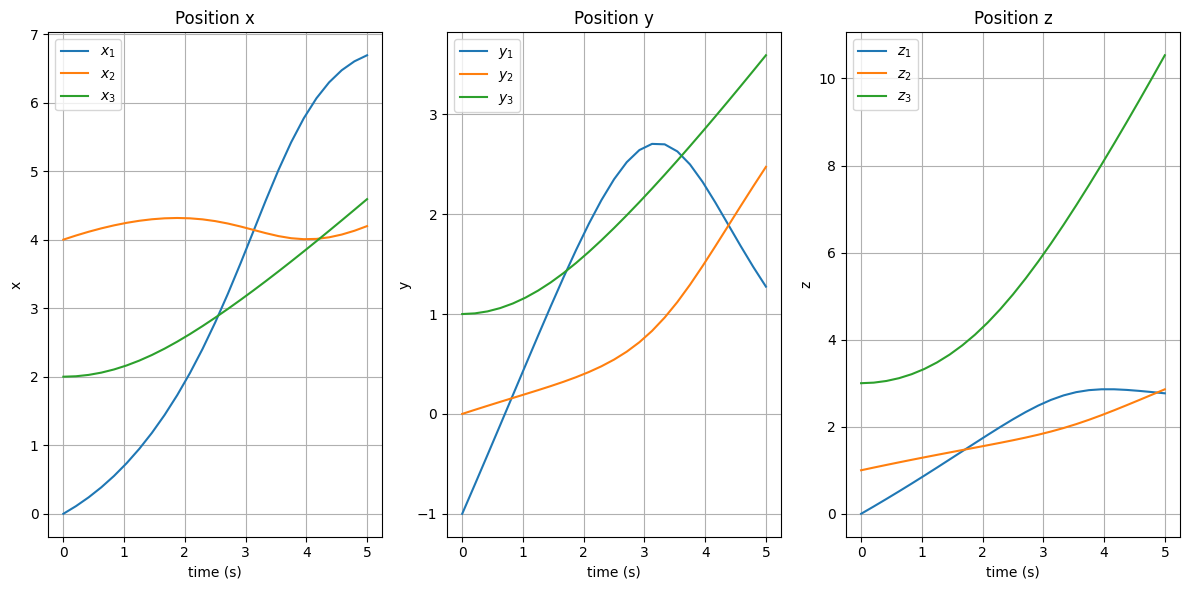

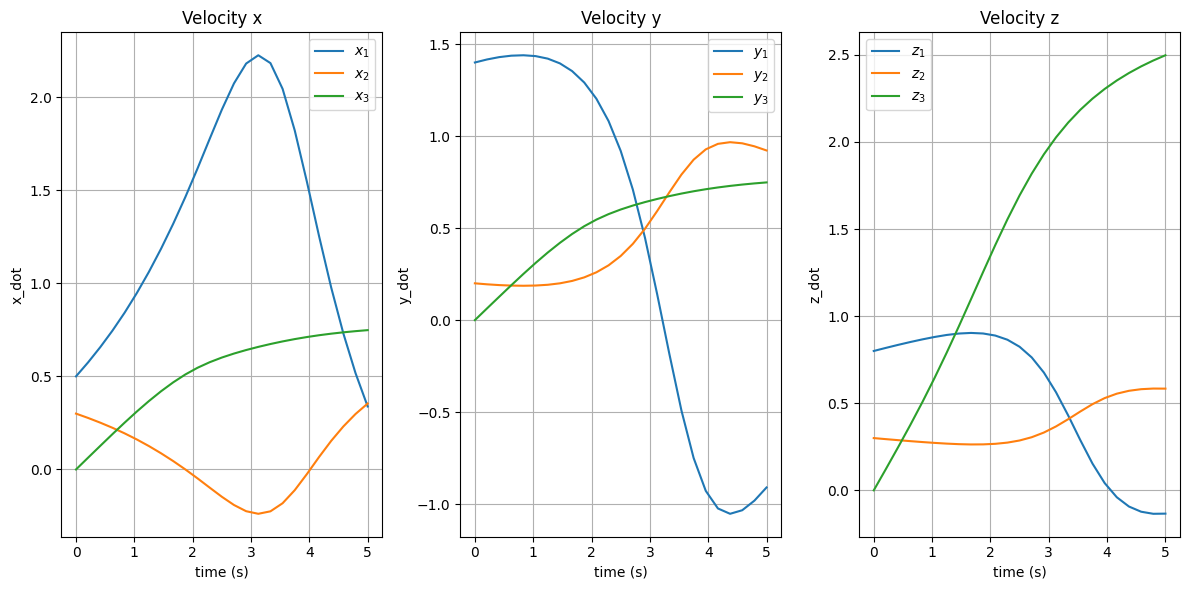

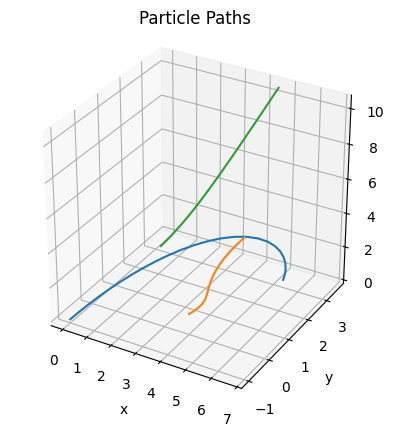

In [15]:
t0=time.time()
# solve the ODE, evaluate at 30 fps
sol = solve_ivp(Gravity_Sim_ODE, [0, duration], x0, 
    t_eval=np.linspace(0,duration,duration*fps))
t1=time.time()
print("Time to solve ODE: ", round(t1-t0), " seconds")

# output of the solver
x_1 = sol.y[0]
x_1_dot = sol.y[1]
x_2 = sol.y[2]
x_2_dot = sol.y[3]
x_3 = sol.y[4]
x_3_dot = sol.y[5]
y_1 = sol.y[6]
y_1_dot = sol.y[7]
y_2 = sol.y[8]
y_2_dot = sol.y[9]
y_3 = sol.y[10]
y_3_dot = sol.y[11]
z_1 = sol.y[12]
z_1_dot = sol.y[13]
z_2 = sol.y[14]
z_2_dot = sol.y[15]
z_3 = sol.y[16]
z_3_dot = sol.y[17]

t = sol.t

#plot x and y over time
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].plot(t, x_1, label="$x_1$")
axs[0].plot(t, x_2, label="$x_2$")
axs[0].plot(t, x_3, label="$x_3$")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x")
axs[0].set_title('Position x')

axs[1].plot(t, y_1, label="$y_1$")
axs[1].plot(t, y_2, label="$y_2$")
axs[1].plot(t, y_3, label="$y_3$")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("y")
axs[1].set_title('Position y')

axs[2].plot(t, z_1, label="$z_1$")
axs[2].plot(t, z_2, label="$z_2$")
axs[2].plot(t, z_3, label="$z_3$")
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("z")
axs[2].set_title('Position z')
plt.tight_layout() 
plt.show()
plt.close()
#velocities:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].plot(t, x_1_dot, label="$x_1$")
axs[0].plot(t, x_2_dot, label="$x_2$")
axs[0].plot(t, x_3_dot, label="$x_3$")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x_dot")
axs[0].set_title('Velocity x')

axs[1].plot(t, y_1_dot, label="$y_1$")
axs[1].plot(t, y_2_dot, label="$y_2$")
axs[1].plot(t, y_3_dot, label="$y_3$")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("y_dot")
axs[1].set_title('Velocity y')

axs[2].plot(t, z_1_dot, label="$z_1$")
axs[2].plot(t, z_2_dot, label="$z_2$")
axs[2].plot(t, z_3_dot, label="$z_3$")
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("z_dot")
axs[2].set_title('Velocity z')
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()
plt.close()

# paths of the two bodies:
#paths over time (3d plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_1, y_1, z_1)
ax.plot(x_2, y_2, z_2)
ax.plot(x_3, y_3, z_3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle Paths')
ax.set_box_aspect([1, 1, 1])
plt.show()
plt.close()


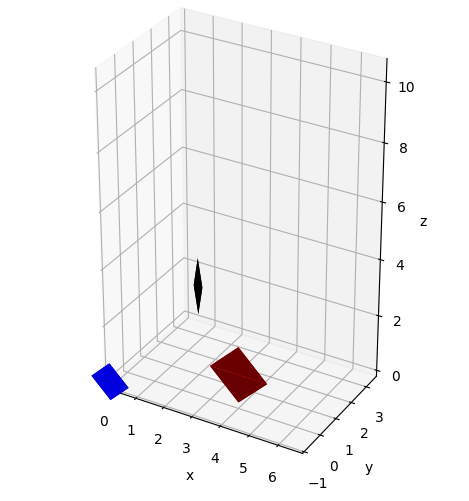

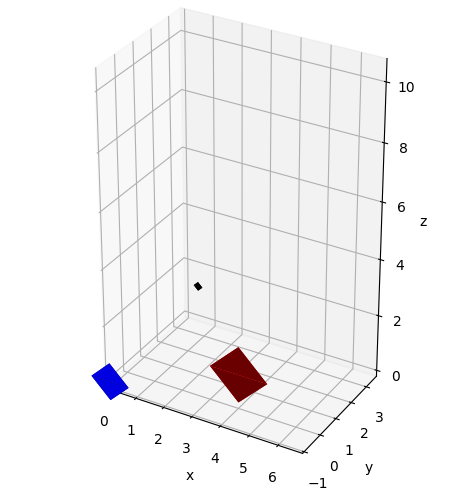

In [16]:
# Animate gravity simulation
import matplotlib.animation as animation
#from ffmpeg import FFmpeg
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle

#snapshot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',aspect='equal')
def calc_min_max(V_1,V_2,V_3):
    return min(min(V_1),min(V_2),min(V_3)), max(max(V_1),max(V_2),max(V_3))
def axis_length(V_1,V_2,V_3):
    l=calc_min_max(V_1,V_2,V_3)[1]-calc_min_max(V_1,V_2,V_3)[0]
    return l
x_lims = calc_min_max(x_1,x_2,x_3)
y_lims = calc_min_max(y_1,y_2,y_3)
z_lims = calc_min_max(z_1,z_2,z_3)
x_length = axis_length(x_1,x_2,x_3)
y_length = axis_length(y_1,y_2,y_3)
z_length = axis_length(z_1,z_2,z_3)

def def_axis():
    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.set_zlim(z_lims)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_box_aspect([x_length,y_length,z_length])
def_axis()

s_1= (m_1/max([m_1,m_2,m_3]))**(1/3)*1
s_2= (m_2/max([m_1,m_2,m_3]))**(1/3)*1
s_3= (m_3/max([m_1,m_2,m_3]))**(1/3)*1



u = np.linspace(0, 2 * np.pi, sphere_verts)
v = np.linspace(0, np.pi, sphere_verts)
x_sphere1 = s_1 * np.outer(np.cos(u), np.sin(v)) 
y_sphere1 = s_1 * np.outer(np.sin(u), np.sin(v))
z_sphere1 = s_1 * np.outer(np.ones(np.size(u)), np.cos(v))
sphere1 = ax.plot_surface(x_sphere1+ x_1_0, y_sphere1+ y_1_0, z_sphere1+ z_1_0, color='b')

x_sphere2 = s_2 * np.outer(np.cos(u), np.sin(v)) 
y_sphere2 = s_2 * np.outer(np.sin(u), np.sin(v)) 
z_sphere2 = s_2 * np.outer(np.ones(np.size(u)), np.cos(v)) 
sphere2 = ax.plot_surface(x_sphere2+ x_2_0, y_sphere2+ y_2_0, z_sphere2+ z_2_0, color='r')

x_sphere3 = s_3 * np.outer(np.cos(u), np.sin(v)) 
y_sphere3 = s_3 * np.outer(np.sin(u), np.sin(v)) 
z_sphere3 = s_3 * np.outer(np.ones(np.size(u)), np.cos(v)) 
sphere2 = ax.plot_surface(x_sphere3+ x_3_0, y_sphere2+ y_3_0, z_sphere2+ z_3_0, color='black')

plt.tight_layout()  
plt.savefig('gravity_sim_3d_3b.png')
plt.show()



#animation:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',aspect='equal')
def_axis()

def check_coll(x_1,x_2,x_3,y_1,y_2,y_3,z_1,z_2,z_3):
    if np.sqrt((x_2-x_1)**2+(y_2-y_1)**2+(z_2-z_1)**2) < s_1+s_2:
        return True
    elif np.sqrt((x_3-x_1)**2+(y_3-y_1)**2+(z_3-z_1)**2) < s_1+s_3:
        return True
    elif np.sqrt((x_2-x_3)**2+(y_2-y_3)**2+(z_2-z_3)**2) < s_3+s_2:
        return True
    else:
        return False

def animate(i):
    ax.clear()
    def_axis()
    px_1 = x_1[i]
    px_2 = x_2[i]
    px_3 = x_3[i]
    py_1 = y_1[i]
    py_2 = y_2[i]
    py_3 = y_3[i]
    pz_1 = z_1[i]
    pz_2 = z_2[i]
    pz_3 = z_3[i]
    ax.plot(x_1[:i+1], y_1[:i+1], z_1[:i+1], color='b',alpha=0.5)
    ax.plot(x_2[:i+1], y_2[:i+1], z_2[:i+1], color='r',alpha=0.5)
    ax.plot(x_3[:i+1], y_3[:i+1], z_3[:i+1], color='black',alpha=0.5)
    if check_coll(x_1[i],x_2[i],x_3[i],y_1[i],y_2[i],y_3[i],z_1[i],z_2[i],z_3[i]):
        ax.text(0, 0, 0, "Collision", color='black', fontsize=20)

    sphere1 = ax.plot_surface(x_sphere1 + px_1, y_sphere1 + py_1, z_sphere1 + pz_1, color='b')
    sphere2 = ax.plot_surface(x_sphere2 + px_2, y_sphere2 + py_2, z_sphere2 + pz_2, color='r')
    sphere3 = ax.plot_surface(x_sphere3 + px_3, y_sphere3 + py_3, z_sphere3 + pz_3, color='black')
      
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ani.save('gravity_sim_3d_3b.gif', writer='pillow', fps=fps)

In [13]:
#test comment